In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -U git+https://github.com/IDEA-Research/GroundingDINO.git

In [ ]:
!pip install https://github.com/VectorInstitute/SegMate.git

In [ ]:
!git clone https://github.com/VectorInstitute/SegMate.git

# SegMate Demo Notebook

Welcome to the SegMate demo notebook! In this notebook, we will showcase the capabilities of SegMate, a Segmentation  toolkit developed by AI Engineering team at Vector Institute.

## SegMate: A Segmentation Toolkit

SegMate is a powerful toolkit that utilizes the foundation models like Segment Anything Model (SAM). SAM is a promptable segmentation system capable of accurately "cutting out" any object from an image with just a single click. It exhibits zero-shot generalization to unfamiliar objects and images, eliminating the need for additional training.

## SAM Architecture

SAM utilizes an architecture comprising three key components: the image encoder, the prompt encoder, and the mask decoder.

- **Image Encoder**: Captures essential features from the input image, extracting high-level representations that encode relevant information about objects and their context. This step allows SAM to understand the visual content of the image.

- **Prompt Encoder**: Processes user-provided prompts, such as bounding boxes, points, or text, and transforms them into meaningful representations. These representations guide SAM to understand the desired object to be segmented.

- **Mask Decoder**: Generates precise segmentation masks by leveraging the encoded information from both the image encoder and the prompt encoder. It efficiently processes the features and produces detailed object boundaries, enabling near real-time segmentation results.

## SegMate Features

- Easy inference with SAM, supporting bounding boxes, points, masks, and text prompts
- Automatic masking without the need for prompts
- Finetune SAM on custom datasets
- GroundingDINO integration for text prompt segmentation
- Custom decoder for detecting a specific type of object

Now, let's dive into the demo and explore the powerful capabilities of SegMate!

Let's start by importing the necessary libraries:

In [5]:
from segmate.segmenter import SAM
from segmate.object_detector import GroundingDINO
from segmate import utils
import datasets
import numpy as np
import torch

### Initializing SAM

To start using SegMate, we need to create an instance of the SAM class. Here, we create an instance called `sm` with the following parameters:

- `model_type`: Specifies the type of model to use. In this case, we are using the `vit_h` model. The options are `vit_b`, `vit_l` and `vit_h`.
- `checkpoint`: Specifies the path to the checkpoint file that contains the pre-trained weights of the model.
- `device`: Specifies the device to run the model on. In this case, we are using the `cuda` device for GPU acceleration.

This instance of the SegMate class serves as our toolkit for performing segmentation tasks with SAM. It encapsulates the model and provides convenient methods for inference and fine-tuning.

Let's create the instance and load the model:

In [17]:
sm = SAM(model_type='vit_h', checkpoint='/content/drive/MyDrive/sam_vit_h_4b8939.pth', device='cuda')

### Adding Object Detector for Text Prompts

If you want to utilize text prompts for segmentation tasks, SegMate provides the ability to incorporate an object detector that processes the text and outputs the corresponding bounding boxes for the specified objects.

To enable text prompts and generate bounding boxes, follow these steps:

1. Create an instance of the object detector specifically designed for text prompts.
2. Use the text object detector to obtain the bounding boxes for segmentation.

Let's use GroundingDINO as an example, the object detector takes in 2 optional arguments, `device` and `ckpt_path`. `device` is set to `cuda` by default, and if no `ckpt_path` is provided, the instance will download the model checkpoint from Hugging Face.

In [7]:
od = GroundingDINO(device="cuda")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


### Loading and Showing an Image

Before we proceed with the segmentation, let's start by loading and displaying an image using some basic functions provided by SegMate.

To load an image, we use the `load_image()` function from the `utils` module. Here, we specify the path to the image file using the `image_path` parameter.

In [11]:
image = utils.load_image(image_path='/content/SegMate/example/images/building.png')

The image dimension is `(H, W, No. of channels)`

In [12]:
image.shape

(500, 500, 3)

After loading the image, we can use the `show_image()` function from the `utils` module to display it. The `show_image()` function takes the loaded image as a parameter and presents it in a graphical format.

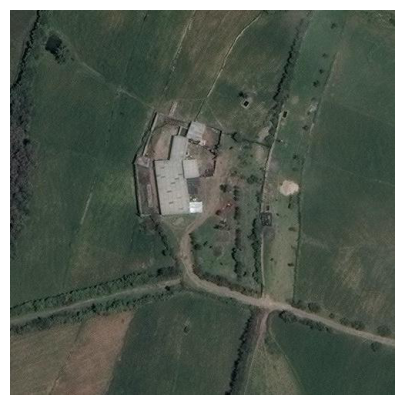

In [15]:
utils.show_image(image, size=5)

### Using Building Image Segmentation Dataset

In this section, we will demonstrate how to load and utilize the Building Image Segmentation dataset, which is available in the HuggingFace datasets library. We will load the mini version of the dataset and retrieve the bounding box, segmentation mask, and image of a sample from the training set.

To begin, we import the necessary libraries and load the dataset using the `load_dataset()` function from the HuggingFace🤗 datasets library:

In [17]:
from datasets import load_dataset

ds = load_dataset("keremberke/satellite-building-segmentation", "mini")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Next, we retrieve a sample from the training set using the dataset's indexing notation. Here, we retrieve the second sample (index 1):

The sample variable now contains the image, bounding box information, and segmentation mask for the selected sample.

In [18]:
sample = ds['train'][1]
image = sample["image"]
bbox = sample['objects']['bbox']
seg_mask = sample['objects']['segmentation']

To visualize the image, bounding boxes, and segmentation mask, we can utilize the utility functions provided by SegMate. First, we display the image using the `show_image()` function:

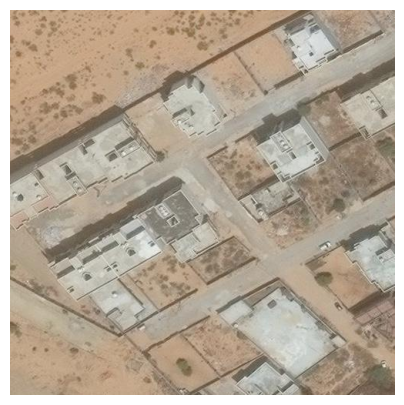

In [21]:
utils.show_image(np.array(image), size=5)

Next, we show the bounding boxes on the image using the `show_bounding_boxes()` function:

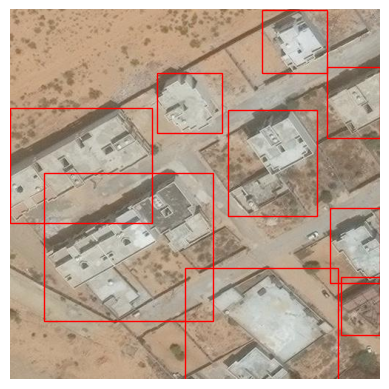

In [22]:
utils.show_bounding_boxes(image=image, bounding_boxes=bbox)

Additionally, we can generate a binary segmentation mask from the segmentation label and display it using the `get_segmentation_mask()` and `show_image()` functions:

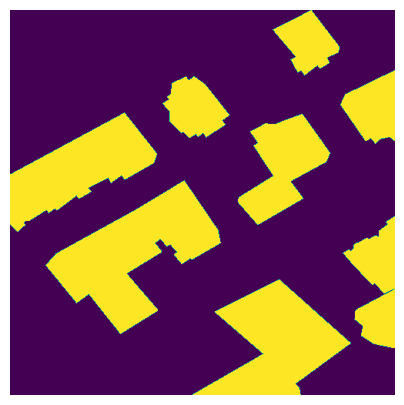

In [24]:
binary_mask = utils.get_segmentation_mask(segmentation_label=seg_mask, size=500)
utils.show_image(binary_mask.reshape(500, 500, 1), size=5)

### Automatic Mask Generation with SAM

In this section, we will demonstrate how to utilize the automatic mask generation feature of SAM without using any prompts. This feature allows SAM to generate segmentation masks automatically based on the input image.

To generate the masks automatically, we will utilize the `auto_segment()` method provided by the SegMate toolkit. This method takes the image as input and returns the generated masks.

In [25]:
masks = sm.auto_segment(image=np.array(image))

We can now use the `visualize_automask()` function from `utils` to visualize the generated masks overlaid on the input image:

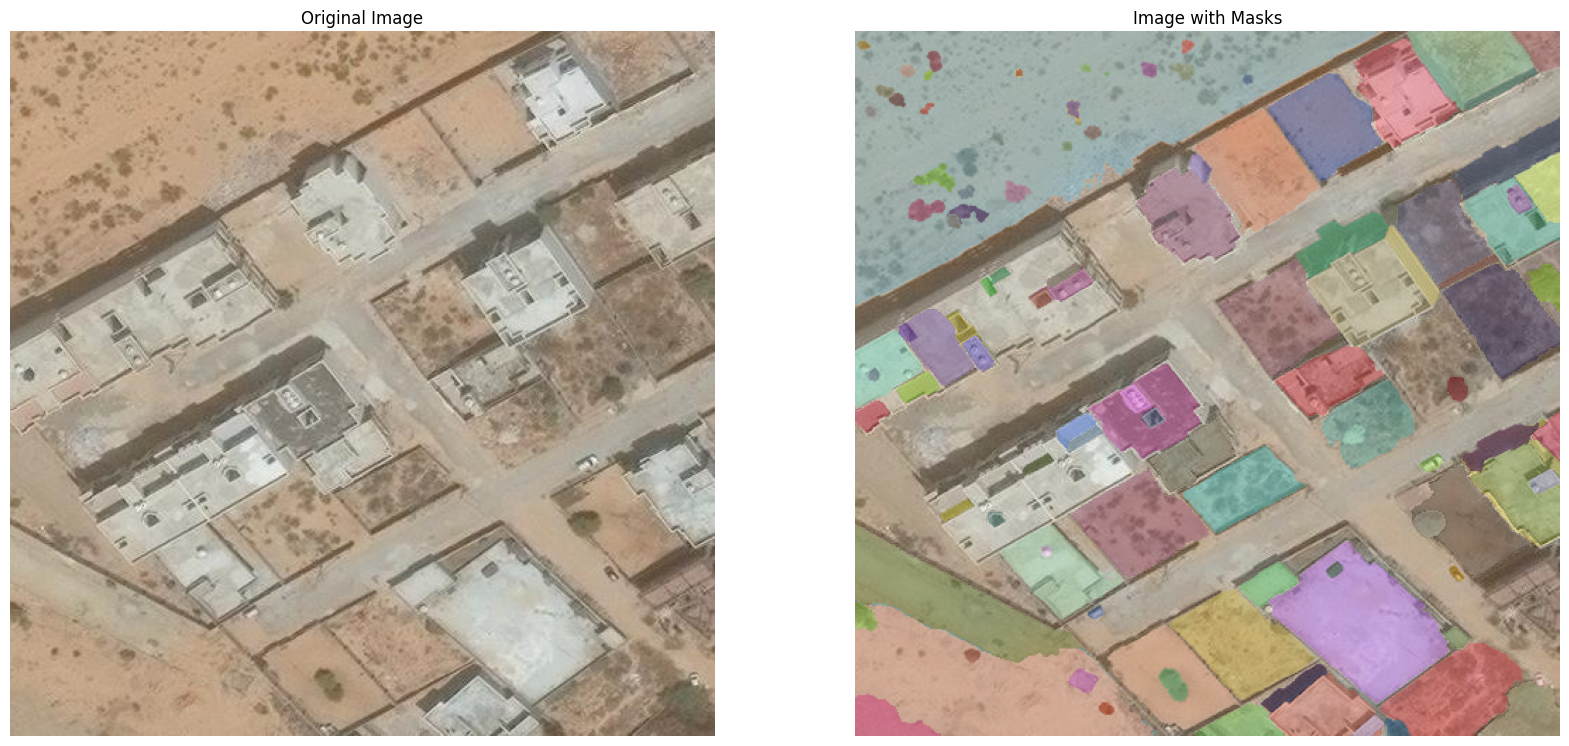

In [26]:
utils.visualize_automask(image=np.array(image), masks=masks)

### Mask Generation using Bounding Boxes

In this section, we will demonstrate how to utilize bounding boxes to generate masks using the SegMate toolkit. By providing bounding boxes as prompts, SAM can generate masks specifically for the objects defined by these boxes.

To generate masks with prompts, we will use the `segment()` method from the `SAM` class. This method takes the input image and bounding box prompts as inputs and returns the corresponding segmentation masks.

Note: The reason we use `utils.convert_coco_to_sam(bbox)` is the bounding box provided by the dataset is in the wrong format. SAM's bounding box format uses `[x_min, y_min, x_max, y_max]`, while the original bounding boxes provided in the bbox variable are in the format `[x_min, y_min, width, height]`, which is the COCO format. The `utils.convert_coco_to_sam()` function converts the bounding boxes from the COCO format to the SAM-compatible format.

In [27]:
masks = sm.segment(image=np.array(image), boxes_prompt=utils.convert_coco_to_sam(bbox))

The shape of the generated mask is `(No. of masks, No. of channels, H, W)`

In [28]:
masks.shape

(9, 3, 500, 500)

Here we use `binarize_mask()` again visualize the generated masks. By default,  the `sum_all_masks` parameter in this function is set to `True`, which means it will sum all the masks and output a single binary mask representing the combined presence of all objects. If we set it to `False`, it will keep the masks separate.

In [29]:
mask = utils.binarize_mask(masks, sum_all_masks=False)

In [30]:
mask.shape

(9, 500, 500)

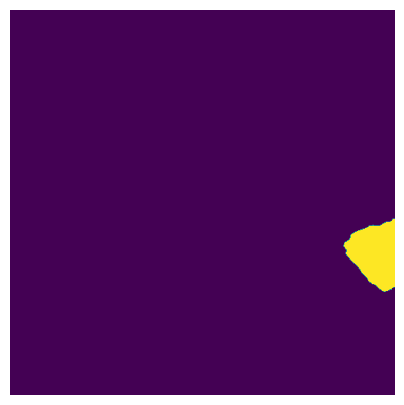

In [32]:
utils.show_image(mask[3].reshape(500, 500, 1), size=5)

In [33]:
mask = utils.binarize_mask(masks, sum_all_masks=True)

In [34]:
mask.shape

(500, 500)

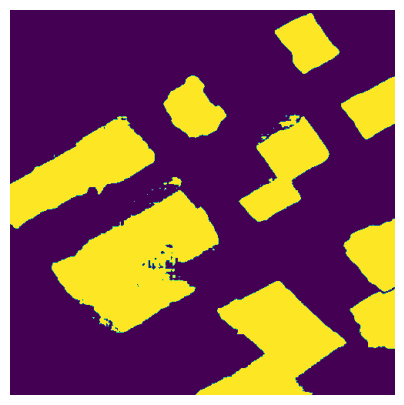

In [36]:
utils.show_image(mask.reshape(500, 500, 1), size=5)

### Mask Generation using Text Prompts

In this section, we will demonstrate how to use text prompts to generate masks. Text prompts provide a convenient way to specify the desired object for segmentation. SAM model by itself does not take text prompts, we need the help of an object detector like GroundingDINO to allow for text prompts:

1. Provide text prompt to the object detector along with bounding box threshold and text threshold (both optional) to generate the bounding boxes.
2. Apply the generated bounding boxes as input to SAM to segment the image

The box threshold and the text threshold control the segmentation sensitivity for the specified object.

We will use two new images as examples:

In [8]:
cat_image = np.asarray(utils.load_image(image_path='/content/SegMate/example/images/cat.jpg'))
building_image = np.asarray(utils.load_image(image_path='/content/SegMate/example/images/building.png'))

In [ ]:
bboxes, _, _ = od.detect(cat_image, "cat", 0.20, 0.25)
cat_mask = sm.segment(cat_image, boxes_prompt=bboxes)

Here instead of coverting the generated mask to a binary mask, we'll use the `show_masks` function as an alternative way to visualize the mask. This function overlays the genrated masks on top of the image.

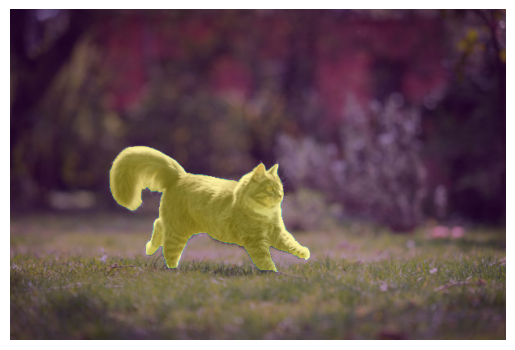

In [13]:
utils.show_masks(cat_image, cat_mask)

In [ ]:
bboxes, _, _ = od.detect(building_image, "building", 0.20, 0.25)
building_mask = sm.segment(building_image, boxes_prompt=bboxes)

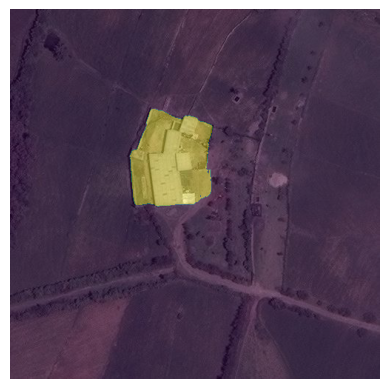

In [16]:
utils.show_masks(building_image, building_mask)

### Mask Generation using Points

Another format of input prompt is using points. Point prompts consist of point coordinates and point labels. Foreground points (labelled `1`) indicate the presence of the object, while background points (labelled `0`) represent the absence of the object.

To generate masks using point prompts, we will use the `segment()` method again.

First, let's pick some points on the image:

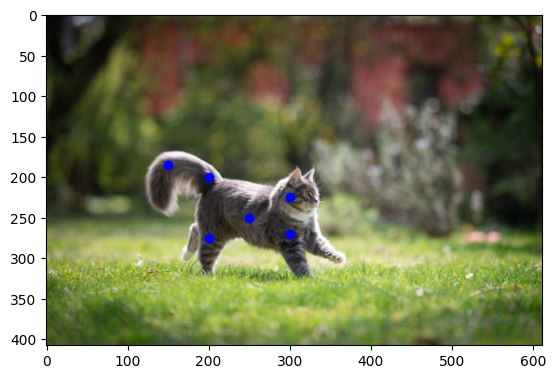

In [18]:
cat_point_coords = [(150, 185), (200, 200), (200, 275), (250, 250), (300, 225), (300, 270)]
cat_point_labels = [1, 1, 1, 1, 1, 1]
utils.show_points(cat_image, cat_point_coords, cat_point_labels)

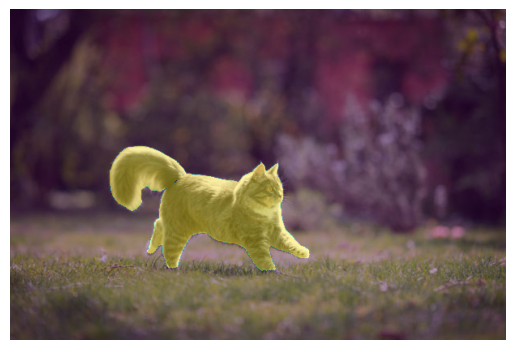

In [19]:
cat_mask = sm.segment(cat_image, points_prompt=[cat_point_coords, cat_point_labels])
utils.show_masks(cat_image, cat_mask)

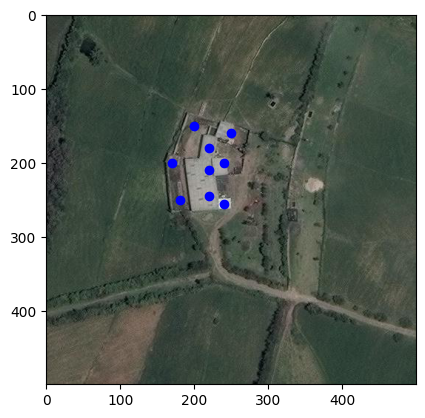

In [38]:
building_point_coords = [
    (170, 200), (180, 250), (250, 160), (240, 200), (220, 245), (200, 150),
    (240, 255), (220, 180), (220, 210)
]
building_point_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1]
utils.show_points(building_image, building_point_coords, building_point_labels)

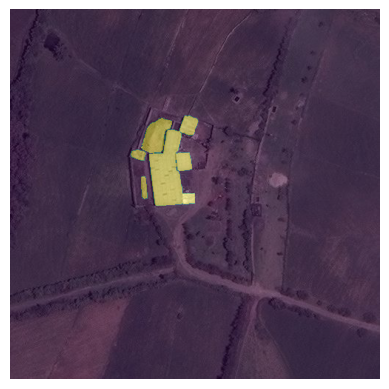

In [39]:
building_mask = sm.segment(building_image, points_prompt=[building_point_coords, building_point_labels])
utils.show_masks(building_image, building_mask)

Suggestions:

*   Use `vit_h` to obtain the best results for point prompts
*   Background points might make the results worse, especially for complex/noisy images


### Fine-tuning on Building Image Segmentation Dataset

In this section, we will demonstrate how to create a PyTorch Dataset instance from the Building Image Segmentation (BIS) dataset and perform SAM model fine-tuning on this dataset.

To begin, create an instance of the `BISDataset` class, which is a custom dataset class designed specifically for the Building Image Segmentation dataset. The `BISDataset` class takes the training subset of the BIS dataset (`dataset['train']`) as input, along with other parameters such as the preprocessing function (`preprocess`), the desired image size (`img_size`), and the device to be used (`device`). Finally, we create a a pytorch data loader to iterate over the dataset.

Let's take a look at the code snippet:

In [49]:
from segmate.dataset import BISDataset

bis_dataset = BISDataset(dataset=ds['train'],
                         preprocess=sm.sam.preprocess,
                         img_size=sm.sam.image_encoder.img_size,
                         device=sm.device)

In [50]:
# create a pytorch data loader
# note: the batch size should be 1
train_loader = torch.utils.data.DataLoader(bis_dataset, batch_size=1, shuffle=False)

Now we can start the fine-tuning process using the `fine_tune()` method from the `SAM` class. The `fine_tune()` method takes the training data `train_data`, learning rate `lr`, number of epochs `num_epochs`, and the original input size `original_input_size` as inputs.

In [51]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(sm.sam.mask_decoder.parameters(), lr=1e-5)

In [52]:
sm.fine_tune(train_data=bis_dataset,
             original_input_size=500,
             criterion=criterion,
             optimizer=optimizer,
             train_loader=train_loader,
             num_epochs=1)

100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

EPOCH: 0
Mean loss: 0.029514667267600696
